In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# <span style="color:orange"> Numerical Simulation Laboratory: Lecture 03 </span>

## Exercise 1

In this exercise we want to estimate the price of an European option under the assumptions of the Block-Scholes Theory. The parameters are:
- interest rate: $r=0.1$ equal to the drift $\mu$
- volatility: $\sigma=0.25$ 
- simulation time: $T=1$ (in a suitable scale)
- starting price: $S(0)=100$ (in a suitable currency)
- strike price: $K=100$

Accordingly, the we expect the following prices respectively for a call and for a put-option:$$ C_{exp}=14.975790778311286\qquad;\qquad P_{exp}=5.4595325819072364$$ 
in the same currency we used for $S(0)$.

The asset price $S(T)$ at time $T$ is evaluated both directly (i.e. with the exact solution of the SDE) and via discretization of the interval $[0,T]$, then it is "pulled back" to the present time to get the price option, respectively given by:
$$ C:=e^{-rT}\max\{0, S(T)-K\}\qquad;\qquad P:=e^{-rT}\max\{0, K-S(T)\}$$

### Block-Scholes Theory solution
We run $M=10^5$ simulations for each method and we estimate uncertainty using the blocking-method with $N=100$ blocks.

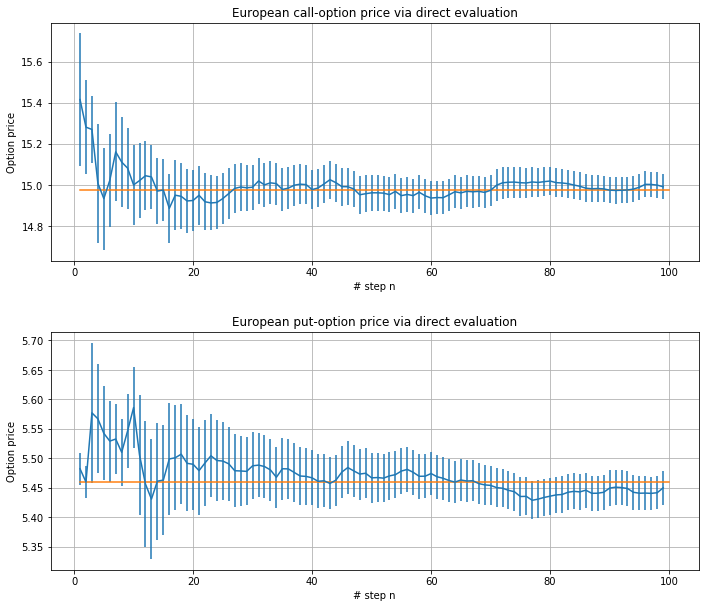

In [3]:
C=14.975790778311286
P=5.4595325819072364

file=open("Es_lezione_03/dataEx03_1.dat")
line1=file.readline().split()
M=int(line1[0])
N=int(line1[1])
x=np.arange(1,N)
ave=np.zeros((4, N-1))
err=np.zeros((4, N-1))
i=0

for line in file.readlines():
    for j in range(4):
        ave[j, i]=float(line.split()[j])
        err[j, i]=float(line.split()[j+4])
    i+=1
    
file.close()

f, canvas=plt.subplots(2)
titles=['European call-option price', 'European put-option price']

for j in range(2):
    canvas[j].errorbar(x, ave[j], yerr=err[j])
    canvas[j].set(xlabel='# step n', ylabel='Option price')
    canvas[j].set_title(titles[j] + ' via direct evaluation')
    canvas[j].grid(True)
    
canvas[0].plot([1,N], [C,C])
canvas[1].plot([1,N], [P,P])
    
plt.subplots_adjust(left=0.2, bottom=-0.7, right=1.7, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

### Discretization of the interval
Same number of simulations and blocks, the interval $[0,T]$ is  partitioned into $100$ subintervals of equal amplitude.

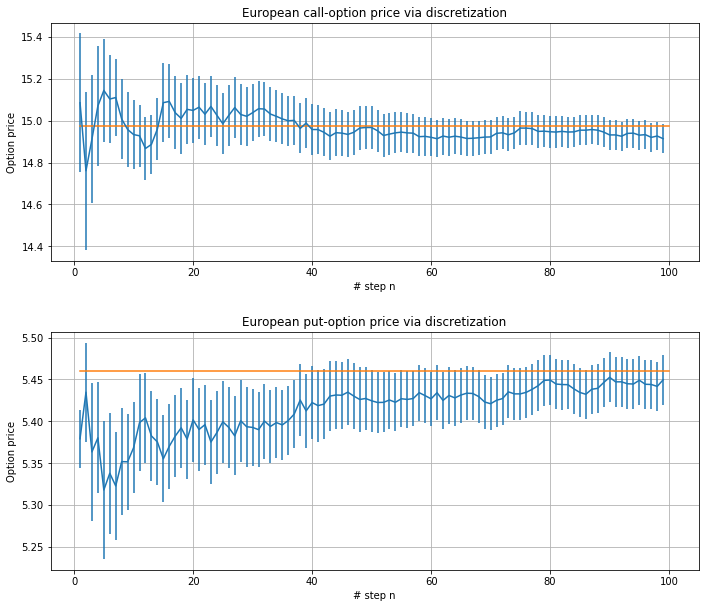

In [4]:
f1, canvas1=plt.subplots(2)
for j in range(2, 4):
    canvas1[j-2].errorbar(x, ave[j], yerr=err[j])
    canvas1[j-2].set(xlabel='# step n', ylabel='Option price')
    canvas1[j-2].set_title(titles[j-2] + ' via discretization')
    canvas1[j-2].grid(True)
    
canvas1[0].plot([1,N], [C,C])
canvas1[1].plot([1,N], [P,P])
    
plt.subplots_adjust(left=0.2, bottom=-0.7, right=1.7, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The mean values of the prices of all the options in both simulations appear to quickly converge to the expected value.

As for the uncertainty, notice that the iteration rule for the discretized properties leads to the following expression for $S(1)$ in terms of $S(0)$:
$$
S(1)=S(0)\exp\biggl[r-\dfrac{\sigma^2}{2}+\sigma\sqrt{h}\sum_{i=1}^NZ_i\biggr]
$$
where $h$ is the step (length of each subinterval) and $Z_i\sim \mathcal{N}(0,1)$. 

The random variable $Z_N:=\sum_{i=1}^NZ_i$, assuming the stochastic indipendence of the $\{Z_i\}$, can be proven (e.g. by differentiation of the CDF) to be distributed according to the convolution of the PDFs of each $Z_i$ (i.e. of $N$ gaussians with the same mean $\nu$ and variance $\kappa^2$). Such function can be easily evaluated (inductively or using Fourier transforms) and it turns out to be:
$$
u_N(x):=(\underbrace{u*\dots *u}_{N \,{\rm times}})(x)=\dfrac{1}{\kappa\sqrt{2N\pi}}\exp\biggl[{-\frac{(x-N\nu)^2}{2N\kappa^2}}\biggr]
$$
i.e. still a normal distribution with expected value $N\nu$ and variance $N\kappa^2$ (in the present case obviously $\nu=0$ and $\kappa=1$). Accordingly, since $\sqrt{N}X\sim\mathcal{N}(0,N)$ if $X\sim\mathcal{N}(0,1)$, then the expression can be rewritten (perhaps not surprisingly) as:
$$
S(1)=S(0)\exp\biggl[r-\dfrac{\sigma^2}{2}+\sigma X\sqrt{Nh}\biggr]
$$
and, since by definition $hN=T=1$, then we find the same expression of the exact solution. Although this may sound quite obvious, the fact that the two PDFs coincide allows us to infer that the estimated uncertainty should be roughly the same, which is what we observe.